In [2]:
import os
import fnmatch
import pandas as pd
import csv
import numpy as np
from pathlib import Path
from openpyxl import load_workbook
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Definitions

path = os.getcwd()

In [4]:
# white background 
sns.set(style="ticks", context="talk")
plt.rcParams.update({"grid.linewidth":0.5, "grid.alpha":0.4})
plt.style.use('default')

In [5]:
# Ketanserin data (exp 1)
df_1 = pd.read_excel(f'{path}/Ketanserin Occupancy.xlsx', sheet_name='Odense Samples', header = 0, engine = 'openpyxl')
df_1.loc[df_1['Treatment'] == 'Harmine + DMT', 'Treatment'] = 'Har + DMT'
df_1.loc[df_1['Treatment'] == 'Harmine', 'Treatment'] = 'Har'
df_1.loc[df_1['Treatment'] == 'VEH', 'Treatment'] = 'Veh'
df_1.drop(df_1.tail(2).index,
        inplace = True)


# MHMZ data (exp 2)
df_2 = pd.read_excel(f'{path}/MHMZ Occupancy.xlsx', sheet_name='MHMZ_SBR', header = 0, engine = 'openpyxl')


/var/folders/lb/nxxqtlbj7yd1c5frnp5_vxk40000gn/T/ipykernel_3172/1622768269.py:22: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(x='Treatment', y='SBR (FCOR-CERE)/CERE', data=df_1[df_1['Region']=='FCOR'], order=['Veh', 'Har', 'DMT', 'Har + DMT'],
/var/folders/lb/nxxqtlbj7yd1c5frnp5_vxk40000gn/T/ipykernel_3172/1622768269.py:50: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(x='Treatment', y='SBR (Front Cort-Cerebellum)/Cerebellum', data=df_2, order=['Veh', 'Har + DMT'],


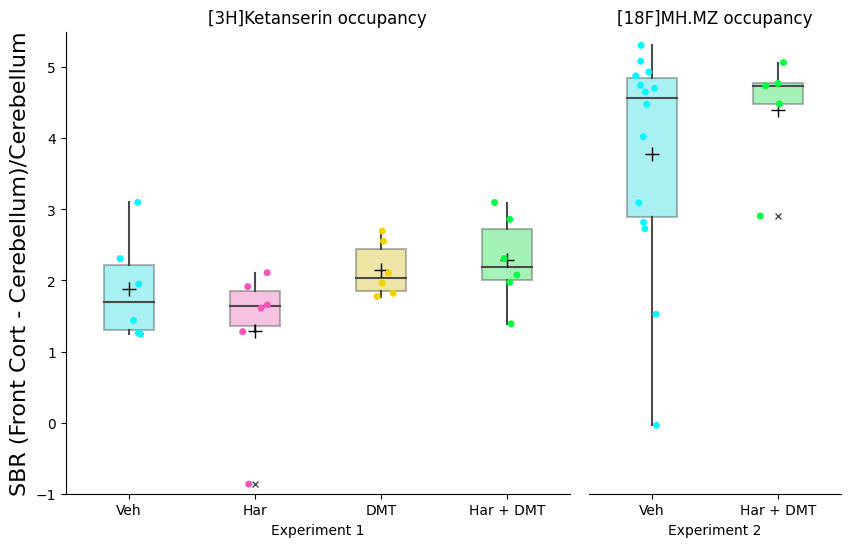

In [8]:
f, axs = plt.subplots(1, 2, figsize=(10, 6), gridspec_kw=dict(width_ratios=[1, 0.5]))
plt.subplots_adjust(hspace = 0.3, wspace = 0.05)

#sns.set(style="ticks", context="talk", rc={"figure.figsize":(10, 10)})

colors = [
   '#08F7FE',  # teal/cyan
    '#FE53BB',  # pink
    '#F5D300',  # yellow
    '#00ff41',] # matrix green


## Ketanserin Exp 1
g = sns.boxplot(x='Treatment', y='SBR (FCOR-CERE)/CERE', data=df_1[df_1['Region']=='FCOR'], order=['Veh', 'Har', 'DMT', 'Har + DMT'], 
                 flierprops={"marker": "x"}, showmeans=True, showcaps=False, meanprops={"marker": "+",
                       "markeredgecolor": "black",
                       "markersize": "10"}, palette=colors, width=.4, boxprops={'alpha': 0.4}, ax=axs[0]) 



old_len_collections = len(g.collections)
sns.stripplot(x='Treatment', y='SBR (FCOR-CERE)/CERE', data=df_1[df_1['Region']=='FCOR'], order=['Veh', 'Har', 'DMT', 'Har + DMT'], 
                 ax=g, palette=colors, dodge=False) 
            
for dots in g.collections[old_len_collections:]:
    dots.set_offsets(dots.get_offsets())# + np.array([-0.05, 0]))

sns.despine()
#axs[0].get_legend().remove()
axs[0].set(ylim=(-1, 5.5))


g.set_title('[3H]Ketanserin occupancy')
g.set_ylabel('SBR (Front Cort - Cerebellum)/Cerebellum', fontsize=16)
g.set_xlabel('Experiment 1')
g.spines[['right', 'top']].set_visible(False)



colors = [
   '#08F7FE',  # teal/cyan
    '#00ff41',] # matrix green
## MHMZ Exp 2
g = sns.boxplot(x='Treatment', y='SBR (Front Cort-Cerebellum)/Cerebellum', data=df_2, order=['Veh', 'Har + DMT'], 
                flierprops={"marker": "x"}, showmeans=True, showcaps=False, meanprops={"marker": "+",
                       "markeredgecolor": "black",
                       "markersize": "10"}, palette=colors, width=.4, boxprops={'alpha': 0.4}, ax=axs[1])

old_len_collections = len(g.collections)
sns.stripplot(x='Treatment', y='SBR (Front Cort-Cerebellum)/Cerebellum', data=df_2, order=['Veh', 'Har + DMT'], 
                ax=g, palette=colors, dodge=False) 
            
for dots in g.collections[old_len_collections:]:
    dots.set_offsets(dots.get_offsets() + np.array([-0.05, 0]))

sns.despine()
axs[1].set(ylim=(-1, 5.5))

g.set_title('[18F]MH.MZ occupancy')
g.set_ylabel(None)
g.set_xlabel('Experiment 2')
g.spines[['right', 'top']].set_visible(False)
g.tick_params(left = False, right = False , labelleft = False) 
                #labelbottom = False, bottom = False)
g.spines[['left', 'right', 'top']].set_visible(False)

# Get the handles and labels. For this example it'll be 2 tuples of length 4 each.
handles, labels = g.get_legend_handles_labels()

# When creating the legend, only use the first two elements to effectively remove the last two.
#l = plt.legend(handles[0:2], labels[0:2], bbox_to_anchor=(1.0, 1.0), loc=1, borderaxespad=0.)
#for handle in l.legendHandles:
 #   handle.set_alpha(0.7)


#rasterized needed for .eps to account for transparency (that comes with the confidence intervals of the regression line)
fig = g.get_figure()
fig.set_rasterized(True)
fig.savefig(f'{path}/plots/Ketanserin_and_MHMZ_SBR_plot.eps', dpi=300, format='eps')
fig.savefig(f'{path}/plots/Ketanserin_and_MHMZ_SBR_plot.png')